In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h5py
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.io import loadmat
from pathlib import Path
from IPython.display import display, Markdown

In [3]:
import lfpreg, batchreg

In [4]:
lfpdata = Path("~/neuropixel/data/LFP_registration_shared/").expanduser()

In [5]:
def showrasters(raw, lfp, csd):
    fig, (aa, ab, ac) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
    aa.imshow(raw, aspect=0.25 * raw.shape[1] / raw.shape[0])
    ab.imshow(lfp, aspect=0.25 * lfp.shape[1] / lfp.shape[0])    
    ac.imshow(csd, aspect=0.25 * csd.shape[1] / csd.shape[0])
    aa.set_ylabel("raw lfp")
    ab.set_ylabel("lfp raster")
    ac.set_ylabel("csd raster")
    ac.set_xlabel("time")

In [6]:
subsamp = 5
thresholds = {"pt01": 0.7, "pt02": 0.7, "pt03": 0.7, "pt04": 0.7}

In [7]:
names = []
plfps = []
pcsds = []
tends = []

for f in sorted(lfpdata.glob("pt*")):
    lfpf = list(f.glob("*LFP.mat"))[0]
    chanmapf = list(f.glob("*ChanMap.mat"))[0]
    ptstr = lfpf.name.split("_")[0]
    display(Markdown(f"## {ptstr}"))
    
    # load a chunk of data
    chanmap = loadmat(chanmapf)
    geom = np.c_[chanmap["xcoords"], chanmap["ycoords"]]
    lfpf = loadmat(lfpf)
    raw = lfpf["LFPMatrix"]
    D, T = raw.shape
    tend = T // 10
    raw = raw[:, :tend]
    chans = range(0, raw.shape[0])
    if "channels_in_brain" in lfpf:
        chans = (lfpf["channels_in_brain"].astype(int) - 1).ravel()
        chans = range(chans[0], chans[1])
    
    # register
    plfp, *_ = batchreg.batch_register_rigid(raw, geom, csd=False, batch_length=50_000, mincorr=thresholds[ptstr])
    pcsd, *_ = batchreg.batch_register_rigid(raw, geom, csd=True, batch_length=50_000, mincorr=thresholds[ptstr])
    
    names.append(ptstr)
    plfps.append(plfp)
    pcsds.append(pcsd)
    tends.append(tend)


## pt01

C 384 T 208250 T_ds 41650


batches:   0%|          | 0/4 [00:00<?, ?it/s]

Build matrices... took 10.669111967086792 s
Kronecker start
lsqr problem shape (110200602, 41650) (110200602,)
 
LSQR            Least-squares solution of  Ax = b
The matrix A has 110200602 rows and 41650 columns
damp = 0.00000000000000e+00   calc_var =        0
atol = 1.00e-08                 conlim = 1.00e+08
btol = 1.00e-08               iter_lim =    83300
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   2.100e+05  2.100e+05    1.0e+00  1.9e-04
     1  0.00000e+00   1.958e+05  1.958e+05    9.3e-01  1.0e-01   1.1e+02  1.0e+00
     2  0.00000e+00   1.944e+05  1.944e+05    9.3e-01  3.7e-02   1.4e+02  2.1e+00
     3  0.00000e+00   1.940e+05  1.940e+05    9.2e-01  1.9e-02   1.7e+02  3.4e+00
     4  0.00000e+00   1.938e+05  1.938e+05    9.2e-01  1.1e-02   2.0e+02  4.9e+00
     5  0.00000e+00   1.938e+05  1.938e+05    9.2e-01  7.4e-03   2.2e+02  6.5e+00
     6  0.00000e+00   1.937e+05  1.937e+05    9.2e-01  5.1e-03   2.4e+02  8.3e+00

batches:   0%|          | 0/4 [00:00<?, ?it/s]

/Users/charlie/neuropixelsLFPregistration/python/pixelCSD.py:35: RuntimeWarning: Mean of empty slice
  mean_CSD = np.nanmean(CSD, 2)


Build matrices... took 0.1365339756011963 s
Kronecker start
lsqr problem shape (4, 41650) (4,)
 
LSQR            Least-squares solution of  Ax = b
The matrix A has 4 rows and 41650 columns
damp = 0.00000000000000e+00   calc_var =        0
atol = 1.00e-08                 conlim = 1.00e+08
btol = 1.00e-08               iter_lim =    83300
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   6.530e+01  6.530e+01    1.0e+00  3.1e-02
     1  0.00000e+00   1.288e-06  1.288e-06    2.0e-08  1.0e+00   2.0e+00  1.0e+00
 
LSQR finished
Ax - b is small enough, given atol, btol                  
 
istop =       1   r1norm = 1.3e-06   anorm = 2.0e+00   arnorm = 2.6e-06
itn   =       1   r2norm = 1.3e-06   acond = 1.0e+00   xnorm  = 3.3e+01
 
Kronecker... took 0.03748798370361328 s


## pt02

C 384 T 218250 T_ds 43650


batches:   0%|          | 0/4 [00:00<?, ?it/s]

Build matrices... took 0.3530571460723877 s
Kronecker start
lsqr problem shape (3255858, 43650) (3255858,)
 
LSQR            Least-squares solution of  Ax = b
The matrix A has 3255858 rows and 43650 columns
damp = 0.00000000000000e+00   calc_var =        0
atol = 1.00e-08                 conlim = 1.00e+08
btol = 1.00e-08               iter_lim =    87300
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   6.322e+04  6.322e+04    1.0e+00  3.9e-04
     1  4.95086e-01   5.329e+04  5.329e+04    8.4e-01  3.6e-01   4.5e+01  1.0e+00
     2  1.36546e+00   4.870e+04  4.870e+04    7.7e-01  1.7e-01   6.6e+01  2.4e+00
     3  2.49156e+00   4.667e+04  4.667e+04    7.4e-01  1.1e-01   8.0e+01  3.9e+00
     4  3.88990e+00   4.550e+04  4.550e+04    7.2e-01  6.9e-02   9.3e+01  5.6e+00
     5  5.47898e+00   4.482e+04  4.482e+04    7.1e-01  5.0e-02   1.0e+02  7.4e+00
     6  7.63376e+00   4.428e+04  4.428e+04    7.0e-01  3.8e-02   1.1e+02  9.5e+00
     

batches:   0%|          | 0/4 [00:00<?, ?it/s]

Build matrices... took 0.24708914756774902 s
Kronecker start
lsqr problem shape (10888, 43650) (10888,)
 
LSQR            Least-squares solution of  Ax = b
The matrix A has 10888 rows and 43650 columns
damp = 0.00000000000000e+00   calc_var =        0
atol = 1.00e-08                 conlim = 1.00e+08
btol = 1.00e-08               iter_lim =    87300
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   2.409e+03  2.409e+03    1.0e+00  4.4e-03
     1  0.00000e+00   1.564e+03  1.564e+03    6.5e-01  5.2e-01   1.4e+01  1.0e+00
     2  0.00000e+00   1.123e+03  1.123e+03    4.7e-01  3.7e-01   1.9e+01  2.3e+00
     3  0.00000e+00   8.871e+02  8.871e+02    3.7e-01  2.5e-01   2.3e+01  3.8e+00
     4  0.00000e+00   7.552e+02  7.552e+02    3.1e-01  1.9e-01   2.6e+01  5.4e+00
     5  0.00000e+00   6.649e+02  6.649e+02    2.8e-01  1.6e-01   3.0e+01  7.2e+00
     6  0.00000e+00   5.961e+02  5.961e+02    2.5e-01  1.2e-01   3.3e+01  9.2e+00
     7  0.

## pt03

C 384 T 146569 T_ds 29314


batches:   0%|          | 0/2 [00:00<?, ?it/s]

Build matrices... took 1.3759710788726807 s
Kronecker start
lsqr problem shape (29888488, 29314) (29888488,)
 
LSQR            Least-squares solution of  Ax = b
The matrix A has 29888488 rows and 29314 columns
damp = 0.00000000000000e+00   calc_var =        0
atol = 1.00e-08                 conlim = 1.00e+08
btol = 1.00e-08               iter_lim =    58628
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   1.356e+04  1.356e+04    1.0e+00  1.8e-03
     1  0.00000e+00   1.285e+04  1.285e+04    9.5e-01  1.4e-01   7.5e+01  1.0e+00
     2  0.00000e+00   1.267e+04  1.267e+04    9.3e-01  6.4e-02   1.0e+02  2.3e+00
     3  0.00000e+00   1.259e+04  1.259e+04    9.3e-01  3.7e-02   1.2e+02  3.7e+00
     4  0.00000e+00   1.255e+04  1.255e+04    9.2e-01  2.3e-02   1.4e+02  5.4e+00
     5  0.00000e+00   1.252e+04  1.252e+04    9.2e-01  1.6e-02   1.6e+02  7.1e+00
     6  0.00000e+00   1.251e+04  1.251e+04    9.2e-01  1.2e-02   1.7e+02  9.0e+00
  

batches:   0%|          | 0/2 [00:00<?, ?it/s]

Build matrices... took 0.5030472278594971 s
Kronecker start
lsqr problem shape (6449392, 29314) (6449392,)
 
LSQR            Least-squares solution of  Ax = b
The matrix A has 6449392 rows and 29314 columns
damp = 0.00000000000000e+00   calc_var =        0
atol = 1.00e-08                 conlim = 1.00e+08
btol = 1.00e-08               iter_lim =    58628
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   5.905e+03  5.905e+03    1.0e+00  3.1e-03
     1  0.00000e+00   5.365e+03  5.365e+03    9.1e-01  2.5e-01   4.4e+01  1.0e+00
     2  0.00000e+00   5.135e+03  5.135e+03    8.7e-01  1.0e-01   6.3e+01  2.4e+00
     3  0.00000e+00   5.059e+03  5.059e+03    8.6e-01  5.7e-02   7.6e+01  3.7e+00
     4  0.00000e+00   5.022e+03  5.022e+03    8.5e-01  3.7e-02   8.8e+01  5.3e+00
     5  0.00000e+00   5.002e+03  5.002e+03    8.5e-01  2.5e-02   9.9e+01  7.1e+00
     6  0.00000e+00   4.989e+03  4.989e+03    8.4e-01  1.7e-02   1.1e+02  9.0e+00
     

## pt04

C 384 T 199500 T_ds 39900


batches:   0%|          | 0/3 [00:00<?, ?it/s]

Build matrices... took 15.848689079284668 s
Kronecker start
lsqr problem shape (203683476, 39900) (203683476,)
 
LSQR            Least-squares solution of  Ax = b
The matrix A has 203683476 rows and 39900 columns
damp = 0.00000000000000e+00   calc_var =        0
atol = 1.00e-08                 conlim = 1.00e+08
btol = 1.00e-08               iter_lim =    79800
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   4.111e+05  4.111e+05    1.0e+00  1.2e-04
     1  3.88346e-02   3.796e+05  3.796e+05    9.2e-01  1.2e-01   1.3e+02  1.0e+00
     2  9.24186e-02   3.763e+05  3.763e+05    9.2e-01  3.4e-02   1.8e+02  2.1e+00
     3  1.70101e-01   3.756e+05  3.756e+05    9.1e-01  1.5e-02   2.2e+02  3.3e+00
     4  2.88666e-01   3.754e+05  3.754e+05    9.1e-01  9.0e-03   2.5e+02  4.8e+00
     5  4.41151e-01   3.753e+05  3.753e+05    9.1e-01  5.5e-03   2.7e+02  6.4e+00
     6  6.34459e-01   3.753e+05  3.753e+05    9.1e-01  3.6e-03   2.9e+02  8.1e+00

batches:   0%|          | 0/3 [00:00<?, ?it/s]

Build matrices... took 0.31891512870788574 s
Kronecker start
lsqr problem shape (115206, 39900) (115206,)
 
LSQR            Least-squares solution of  Ax = b
The matrix A has 115206 rows and 39900 columns
damp = 0.00000000000000e+00   calc_var =        0
atol = 1.00e-08                 conlim = 1.00e+08
btol = 1.00e-08               iter_lim =    79800
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   6.798e+02  6.798e+02    1.0e+00  3.8e-02
     1  0.00000e+00   1.897e+02  1.897e+02    2.8e-01  6.2e-01   2.7e+01  1.0e+00
     2  0.00000e+00   8.859e+01  8.859e+01    1.3e-01  2.7e-01   3.3e+01  2.2e+00
     3  0.00000e+00   6.444e+01  6.444e+01    9.5e-02  2.3e-01   3.6e+01  3.7e+00
     4  0.00000e+00   5.212e+01  5.212e+01    7.7e-02  2.0e-01   4.0e+01  5.3e+00
     5  0.00000e+00   4.336e+01  4.336e+01    6.4e-02  1.5e-01   4.3e+01  7.2e+00
     6  0.00000e+00   3.666e+01  3.666e+01    5.4e-02  1.3e-01   4.6e+01  9.3e+00
     7 

## pt01, $T=208250$

orig (384, 41650) (41650,) (41650,) 208250 41650
reg a
reg b


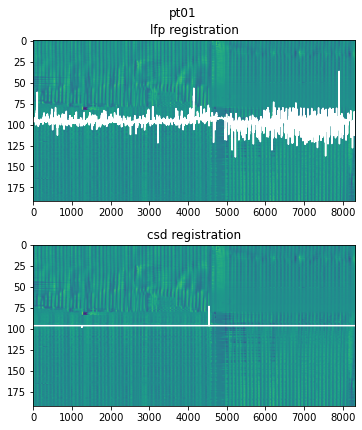

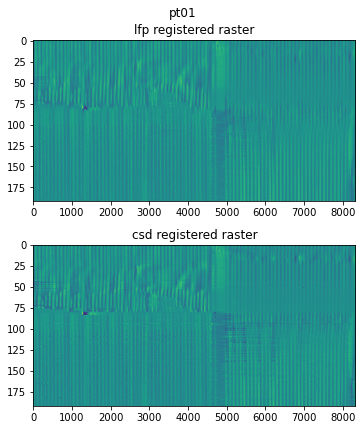

## pt02, $T=218250$

orig (384, 43650) (43650,) (43650,) 218250 43650
reg a
reg b


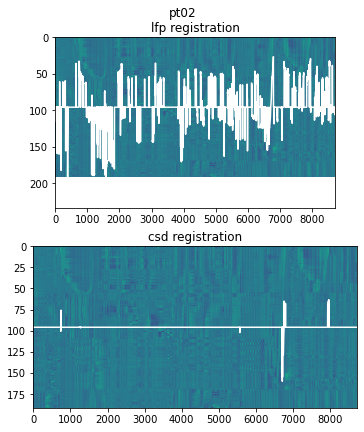

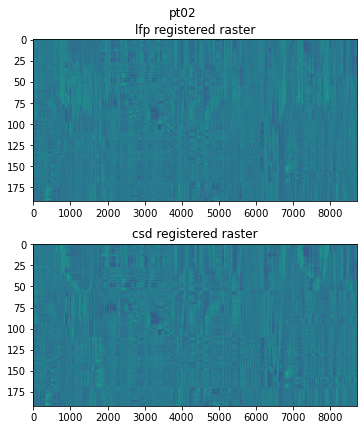

## pt03, $T=146569$

orig (384, 29314) (29314,) (29314,) 146569 29313
reg a
reg b


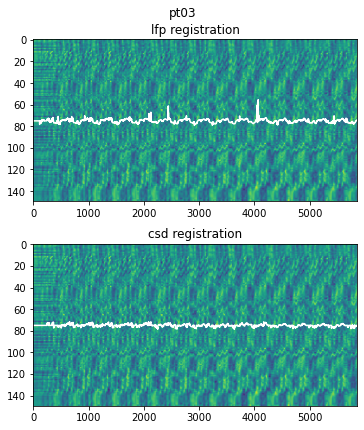

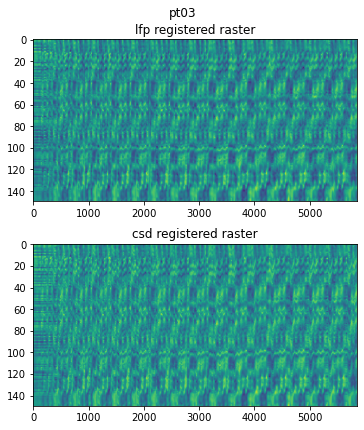

## pt04, $T=199500$

orig (384, 39900) (39900,) (39900,) 199500 39900
reg a
reg b


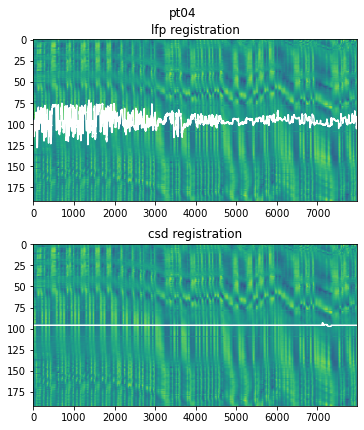

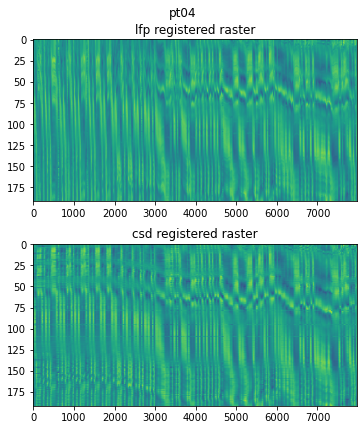

In [8]:
for n, plfp, pcsd, tend, fn in zip(names, plfps, pcsds, tends, sorted(lfpdata.glob("pt*"))):
    display(Markdown(f"## {n}, $T={tend}$"))
    
    lfpf = list(fn.glob("*LFP.mat"))[0]
    chanmapf = list(fn.glob("*ChanMap.mat"))[0]
    
    # load a chunk of data
    chanmap = loadmat(chanmapf)
    geom = np.c_[chanmap["xcoords"], chanmap["ycoords"]]
    lfpf = loadmat(lfpf)
    raw = lfpf["LFPMatrix"]
    D, T = raw.shape
    raw = raw[:, :tend:subsamp]
    print("orig", raw.shape, plfp.shape, pcsd.shape, tend, tend // subsamp)
    chans = range(0, raw.shape[0])
    if "channels_in_brain" in lfpf:
        chans = (lfpf["channels_in_brain"].astype(int) - 1).ravel()
        chans = range(chans[0], chans[1])
    
    plot_subsamp = 5
    raw = raw[:, ::plot_subsamp]
    plfp = plfp[::plot_subsamp]
    pcsd = pcsd[::plot_subsamp]
    
        
    # get raster
    rss = lfpreg.lfpraster(raw, geom, channels=chans)
    print("reg a", flush=True)
    rsslfpreg = lfpreg.rigid_registered_raster(rss, plfp)
    print("reg b", flush=True)
    rsscsdreg = lfpreg.rigid_registered_raster(rss, pcsd)
    
    
    # vis a section
    fig, (aa, ab) = plt.subplots(2, 1, figsize=(5, 6))
    aa.imshow(rss, aspect=0.5 * rss.shape[1] / rss.shape[0])
    ab.imshow(rss, aspect=0.5 * rss.shape[1] / rss.shape[0])
    aa.plot(rss.shape[0] / 2 + plfp, c="w")
    ab.plot(rss.shape[0] / 2 + pcsd, c="w")
    aa.set_title("lfp registration")
    ab.set_title("csd registration")
    fig.suptitle(n)
    fig.tight_layout(pad=0.5)
    plt.show()
    
    # plot registered rasters
    fig, (aa, ab) = plt.subplots(2, 1, figsize=(5, 6))
    aa.imshow(rsslfpreg, aspect=0.5 * rsslfpreg.shape[1] / rsslfpreg.shape[0])
    ab.imshow(rsscsdreg, aspect=0.5 * rsscsdreg.shape[1] / rsscsdreg.shape[0])
    aa.set_title("lfp registered raster")
    ab.set_title("csd registered raster")
    fig.suptitle(n)
    fig.tight_layout(pad=0.5)
    plt.show()

## pt01, $T=208250$

orig (384, 41650) (41650,) (41650,) 208250 41650
10412
reg a
reg b


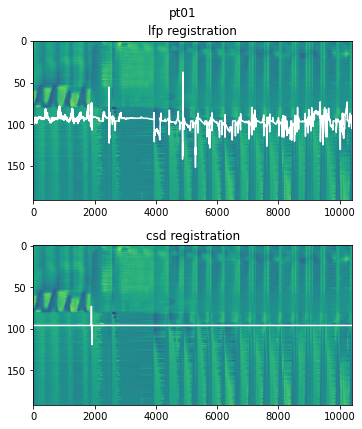

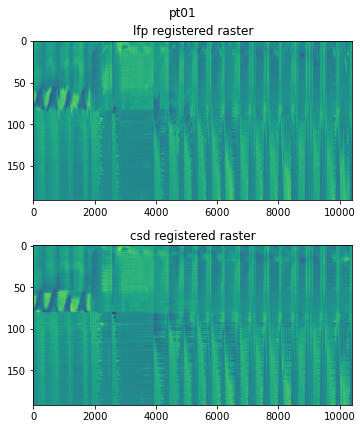

## pt02, $T=218250$

orig (384, 43650) (43650,) (43650,) 218250 43650
10912
reg a
reg b


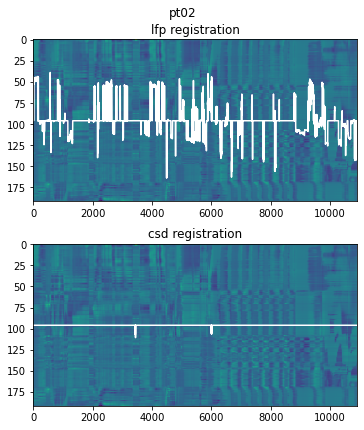

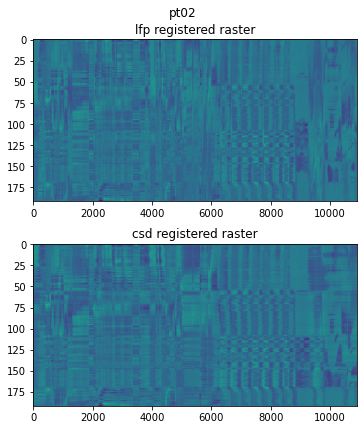

## pt03, $T=146569$

orig (384, 29314) (29314,) (29314,) 146569 29313
7328
reg a
reg b


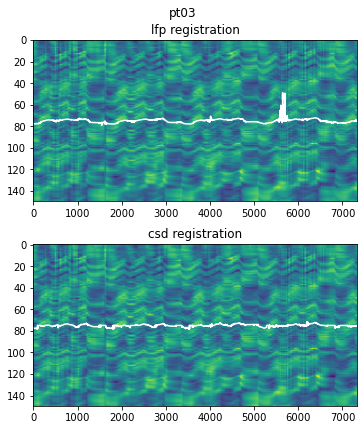

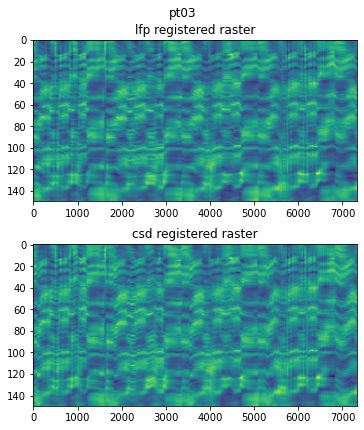

## pt04, $T=199500$

orig (384, 39900) (39900,) (39900,) 199500 39900
9975
reg a
reg b


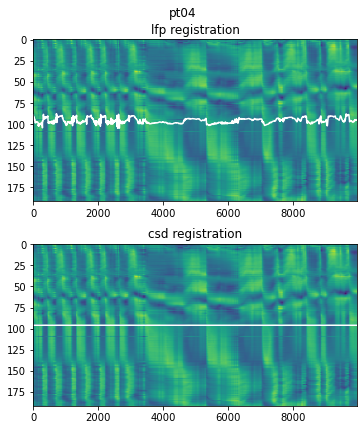

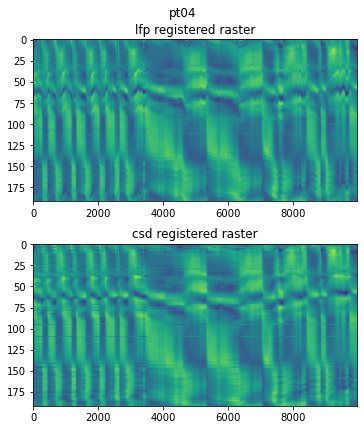

In [9]:
for n, plfp, pcsd, tend, fn in zip(names, plfps, pcsds, tends, sorted(lfpdata.glob("pt*"))):
    display(Markdown(f"## {n}, $T={tend}$"))
    
    lfpf = list(fn.glob("*LFP.mat"))[0]
    chanmapf = list(fn.glob("*ChanMap.mat"))[0]
    
    # load a chunk of data
    chanmap = loadmat(chanmapf)
    geom = np.c_[chanmap["xcoords"], chanmap["ycoords"]]
    lfpf = loadmat(lfpf)
    raw = lfpf["LFPMatrix"]
    D, T = raw.shape
    raw = raw[:, :tend:subsamp]
    print("orig", raw.shape, plfp.shape, pcsd.shape, tend, tend // subsamp)
    chans = range(0, raw.shape[0])
    if "channels_in_brain" in lfpf:
        chans = (lfpf["channels_in_brain"].astype(int) - 1).ravel()
        chans = range(chans[0], chans[1])
    
    plot_start = raw.shape[1] // 2
    plot_end = 3 * raw.shape[1] // 4
    print(plot_end - plot_start)
    
    raw = raw[:, plot_start:plot_end]
    plfp = plfp[plot_start:plot_end]
    pcsd = pcsd[plot_start:plot_end]
    
        
    # get raster
    rss = lfpreg.lfpraster(raw, geom, channels=chans)
    print("reg a", flush=True)
    rsslfpreg = lfpreg.rigid_registered_raster(rss, plfp)
    print("reg b", flush=True)
    rsscsdreg = lfpreg.rigid_registered_raster(rss, pcsd)
    
    
    # vis a section
    fig, (aa, ab) = plt.subplots(2, 1, figsize=(5, 6))
    aa.imshow(rss, aspect=0.5 * rss.shape[1] / rss.shape[0])
    ab.imshow(rss, aspect=0.5 * rss.shape[1] / rss.shape[0])
    aa.plot(rss.shape[0] / 2 + plfp, c="w")
    ab.plot(rss.shape[0] / 2 + pcsd, c="w")
    aa.set_title("lfp registration")
    ab.set_title("csd registration")
    fig.suptitle(n)
    fig.tight_layout(pad=0.5)
    plt.show()
    
    # plot registered rasters
    fig, (aa, ab) = plt.subplots(2, 1, figsize=(5, 6))
    aa.imshow(rsslfpreg, aspect=0.5 * rsslfpreg.shape[1] / rsslfpreg.shape[0])
    ab.imshow(rsscsdreg, aspect=0.5 * rsscsdreg.shape[1] / rsscsdreg.shape[0])
    aa.set_title("lfp registered raster")
    ab.set_title("csd registered raster")
    fig.suptitle(n)
    fig.tight_layout(pad=0.5)
    plt.show()